In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns                                      
import json 
from datetime import datetime
import os 
import pickle 

In [2]:
data = json.load(open('acndata_sessions.json'))
sessions = pd.DataFrame(data['_items'])
#sessions= pd.read_json('acndata_sessions.json')

In [3]:
sessions.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None


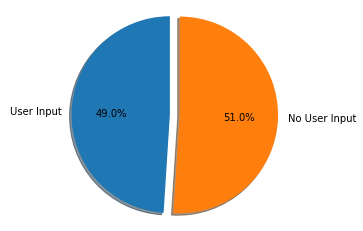

In [4]:
not_input= sessions['userInputs'].isnull().sum()/sessions.shape[0]*100
is_input= (sessions.shape[0] - sessions['userInputs'].isnull().sum())/sessions.shape[0]*100
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'User Input', 'No User Input'
sizes = [is_input, not_input]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'User Input')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The previous plot shows that almost half (51%) of the users during the charging sessions didn't provide any user input, which may affect the induvidual user behavior analysis 

In [114]:
s_100= sessions['userID'].value_counts().sort_values(ascending=False)>100
sessions['userID'].value_counts().sort_values(ascending=False)[s_100].index

Index(['000000743', '000000562', '000001082', '000000891', '000001470',
       '000000558', '000001124', '000000712', '000000560', '000001095',
       '000000567', '000000324', '000000714', '000000569', '000001366',
       '000001746', '000000838', '000001104', '000001083', '000002170',
       '000000858', '000000069', '000000559', '000001912', '000000668',
       '000000676', '000000620', '000000832', '000001135', '000001534',
       '000001137', '000002461', '000000431', '000000515', '000001099',
       '000001133', '000001202'],
      dtype='object')

In [20]:
s_50= sessions['userID'].value_counts().sort_values(ascending=False)>50
sessions['userID'].value_counts().sort_values(ascending=False)[s_50].index

Index(['000000743', '000000562', '000001082', '000000891', '000001470',
       '000000558', '000001124', '000000712', '000000560', '000001095',
       '000000567', '000000324', '000000714', '000000569', '000001366',
       '000001746', '000000838', '000001104', '000001083', '000002170',
       '000000858', '000000069', '000000559', '000001912', '000000668',
       '000000676', '000000620', '000000832', '000001135', '000001534',
       '000001137', '000002461', '000000431', '000000515', '000001099',
       '000001133', '000001202', '000000248', '000000754', '000000489',
       '000001222', '000000365', '000000945', '000000818', '000001001',
       '000001164', '000003853', '000000632', '000000751', '000001126',
       '000001108', '000001161', '000001920', '000000234', '000000564',
       '000001564', '000001154', '000001039', '000001524', '000000777',
       '000001263', '000000300', '000000697', '000000068', '000000710',
       '000000579', '000001208', '000005594', '000000566', '0000

Top 40 users who use had charging sessions with user input are extracted in the top_users_ids DataFrame

In [5]:
top_users_ids= sessions['userID'].value_counts().sort_values(ascending=False).iloc[:40]

In [6]:
pd.DataFrame(top_users_ids).head()

,userID
000000743,462
000000562,374
000001082,295
000000891,294
000001470,266


This is what user input actually looks: 

In [7]:
sessions[sessions['userID']== '000000743']['userInputs'][13113]

[{'WhPerMile': 500,
  'kWhRequested': 5.0,
  'milesRequested': 10,
  'minutesAvailable': 423,
  'modifiedAt': 'Thu, 01 Nov 2018 13:55:43 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Thu, 01 Nov 2018 20:58:03 GMT',
  'userID': 743},
 {'WhPerMile': 500,
  'kWhRequested': 5.0,
  'milesRequested': 10,
  'minutesAvailable': 423,
  'modifiedAt': 'Thu, 01 Nov 2018 13:56:06 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Thu, 01 Nov 2018 20:58:03 GMT',
  'userID': 743},
 {'WhPerMile': 500,
  'kWhRequested': 10.0,
  'milesRequested': 20,
  'minutesAvailable': 424,
  'modifiedAt': 'Thu, 01 Nov 2018 13:56:37 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Thu, 01 Nov 2018 20:59:03 GMT',
  'userID': 743},
 {'WhPerMile': 500,
  'kWhRequested': 10.0,
  'milesRequested': 20,
  'minutesAvailable': 143,
  'modifiedAt': 'Thu, 01 Nov 2018 14:01:21 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Thu, 01 Nov 2018 16:18:03 GMT',
  'userID': 743},
 {'WhPerMile': 500

We import the list of the missing timeseries IDs to remove them from the dataset 

In [8]:
with open('current_error_list.pkl', 'rb') as f:
    current_nans = pickle.load(f)       



In [9]:
current_to_remove= [x.split('.')[0] for x in current_nans]

In [10]:
with open('pilot_error_list.pkl', 'rb') as f:
    pilot_nans = pickle.load(f)


In [11]:
pilot_to_remove= [x.split('.')[0] for x in pilot_nans]

In [12]:
print(len(current_nans),len(pilot_nans))

1258 1256


In [13]:
clean_sessions= sessions[~sessions['_id'].isin(current_to_remove)]

## Timeseries analysis 

In [7]:
dummy_ts= pd.read_csv('ChargingCurrent/5bc90cb9f9af8b0d7fe77cd2.csv',parse_dates=["timestamps"])

In [11]:
dummy_ts.shape

(2611, 3)

In [9]:
dummy_ts_pilot= pd.read_csv('PilotSignal/5bc90cb9f9af8b0d7fe77cd2.csv',parse_dates=["timestamps"])

In [10]:
dummy_ts_pilot.head()

,timestamps,pilot,Relative time
0,2018-04-25 04:07:05-07:00,0.0,0
1,2018-04-25 04:07:08-07:00,0.0,3
2,2018-04-25 04:07:10-07:00,0.0,5
3,2018-04-25 04:07:13-07:00,0.0,8
4,2018-04-25 04:07:18-07:00,0.0,13


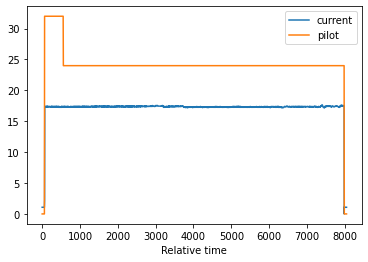

In [11]:
fix, axs = plt.subplots()
dummy_ts.plot(x='Relative time',y='current',ax=axs)
dummy_ts_pilot.plot(x='Relative time',y='pilot', ax=axs)
plt.show()

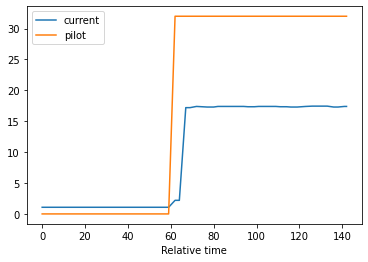

In [15]:
fix, axs = plt.subplots()
dummy_ts.iloc[:50].plot(x='Relative time',y='current',ax=axs)
dummy_ts_pilot.iloc[:50].plot(x='Relative time',y='pilot', ax=axs)
plt.show()

In [8]:
def plot_signals(id,window=50):
    """Plots Charging Current vs Pilot Signal of a given session ID, with a custom window length (starting from t=0s)
    :variables: str,int(optional): session ID, window length (s) 
    """
    current_df= pd.read_csv(f'ChargingCurrent/{id}',parse_dates=["timestamps"]) 
    pilot_df= pd.read_csv(f'PilotSignal/{id}',parse_dates=["timestamps"])
    fix, axs = plt.subplots()
    current_df.iloc[:window].plot(x='Relative time',y='current',ax=axs)
    pilot_df.iloc[:window].plot(x='Relative time',y='pilot', ax=axs)
    plt.show() 


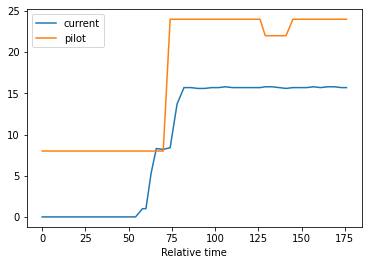

In [16]:
plot_signals(os.listdir('ChargingCurrent/')[1])

### Single user charging timeseries 

In [17]:
user_1= clean_sessions[clean_sessions['userID']== '000000743']
user_1.reset_index(inplace=True)
user_1 ['_id'][:10]

0    5c2e858ef9af8b13dab074de
1    5c2e858ef9af8b13dab07509
2    5c2e85bef9af8b13dab0751f
3    5c2e85bef9af8b13dab07532
4    5c2e85daf9af8b13dab07553
5    5c2e85eef9af8b13dab0756b
6    5c2e8629f9af8b13dab07586
7    5c2e8629f9af8b13dab075a3
8    5c2e8674f9af8b13dab075cd
9    5c2e8674f9af8b13dab075ec
Name: _id, dtype: object

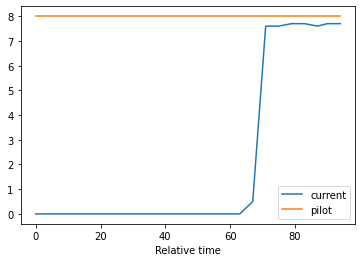

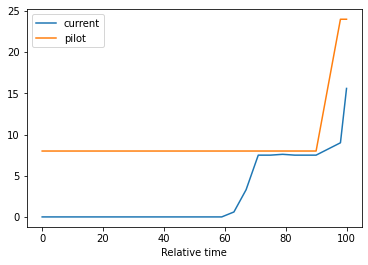

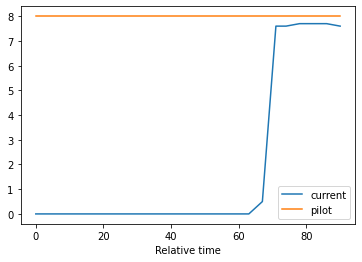

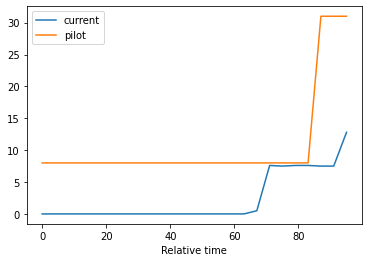

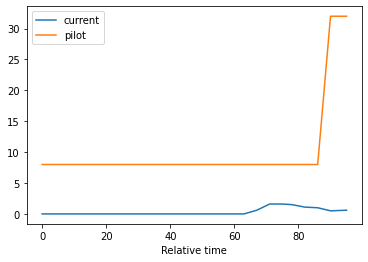

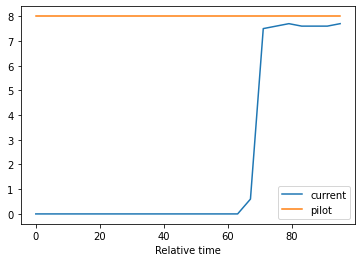

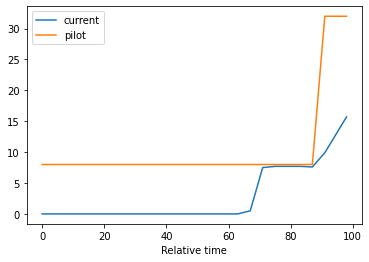

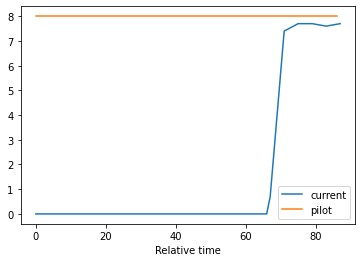

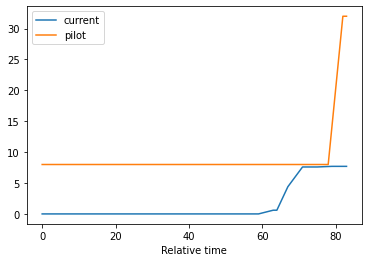

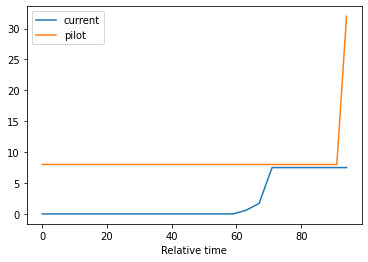

In [18]:
for id_ in user_1 ['_id'][:10]: 
    id_= id_+'.csv'
    plot_signals(id_,25) 

In [19]:
user_2= clean_sessions[clean_sessions['userID']== '000000562']
user_2.reset_index(inplace=True)
user_2 ['_id'][:10]

0    5bc94053f9af8b0dc677de30
1    5bc940b4f9af8b0dc677de71
2    5bc940b4f9af8b0dc677de95
3    5bc94120f9af8b0dc677dede
4    5bc94185f9af8b0dc677df3c
5    5bc941ddf9af8b0dc677df97
6    5be2fafef9af8b2b0edf9ea7
7    5be2fafef9af8b2b0edf9ec0
8    5be2fb55f9af8b2b0edf9efc
9    5be2fba6f9af8b2b0edf9f62
Name: _id, dtype: object

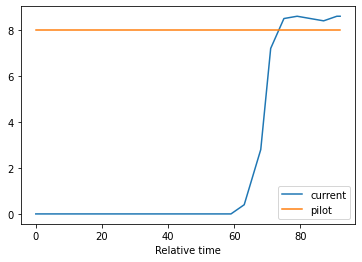

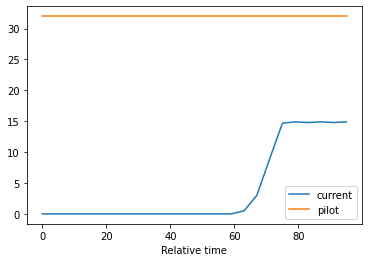

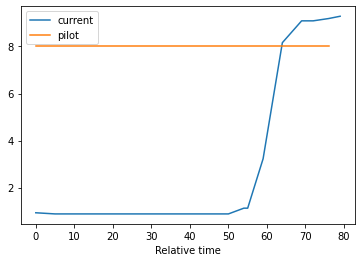

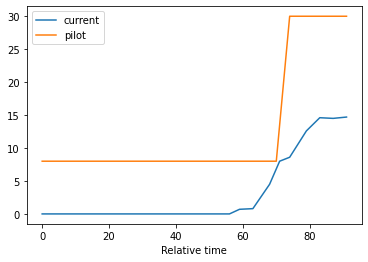

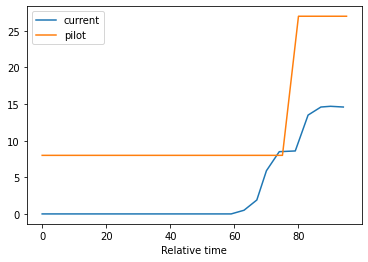

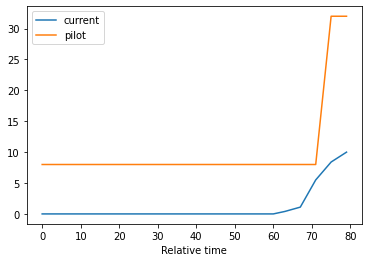

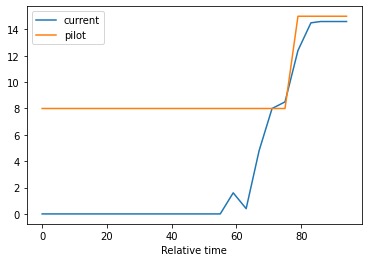

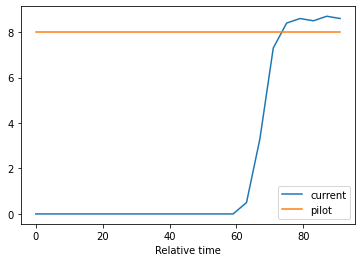

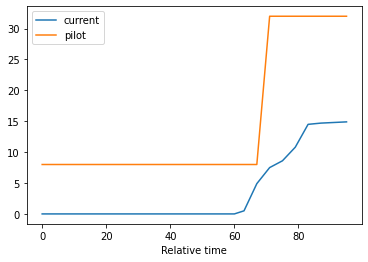

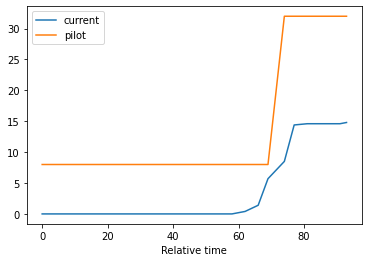

In [20]:
for id_ in user_2 ['_id'][:10]: 
    id_= id_+'.csv'
    plot_signals(id_,25) 

Observations from the previous experiment show that a single user's vehicle can be fully charectirized using the first 80 Seconds of the charging session, an assumption to be proven 

In [26]:
l = min(dummy_ts_pilot.shape[0],dummy_ts.shape[0])
(np.array(dummy_ts_pilot['pilot'])[:l]-np.array(dummy_ts['current'])[:l]).sum()

18479.100684228757

In [21]:
features_dict= {}
def time_to_sec(time): 
    return (time.hour * 60 + time.minute) * 60 + time.second

def feature_extract(id): 
    """Extracts features like length/mean/max current from a given time series timeseries, aggretad wasted energy
    Input: a session ID (str)
    Output: A dictionary of different session features 
    """
    current_df= pd.read_csv(f'ChargingCurrent/{id}.csv',parse_dates=["timestamps"]) 
    pilot_df= pd.read_csv(f'PilotSignal/{id}.csv',parse_dates=["timestamps"])
    l = min(pilot_df.shape[0],current_df.shape[0])
    duration= time_to_sec(current_df['timestamps'][current_df.shape[0]-1])-time_to_sec(current_df['timestamps'][0])
    avg_current= current_df['current'].mean()
    max_current= current_df['current'].max()
    
    wasted= (np.array(pilot_df['pilot'])[:l]-np.array(current_df['current'])[:l]).sum() * duration 
    return {'Session duration (s)':duration, 'avg current': avg_current,'max current': max_current, 'wasted energy':wasted}

In [22]:
dicts_from_file = []
with open('features_.txt','r') as inf:
    for line in inf:
        dicts_from_file.append(eval(line))  
deatures_dict= dicts_from_file[0]  

In [24]:
data_sample= pd.DataFrame.from_dict(deatures_dict, orient='index')

In [25]:
data_sample.head()

,Session duration (s),avg current,max current,wasted energy
5cda0c16f9af8b0565023a33,9695,4.893833,15.1,145283453.0
5cf46a20f9af8b02df9e088b,10215,16.931574,32.0,26713246.5
5bc92edcf9af8b0dc677cced,10186,6.813421,15.7,458544180.6
5bc92ab1f9af8b0dc677c8e6,10207,17.229586,31.0,27749770.9
5bc93a46f9af8b0dc677d800,9686,3.429266,15.9,579106568.0


In [26]:
dicts_from_file = []
with open('missed_features.txt','r') as inf:
    for line in inf:
        dicts_from_file.append(eval(line))  
missed_features_dict= dicts_from_file[0]  

In [27]:
missed= pd.DataFrame.from_dict(missed_features_dict, orient='index')

In [30]:
features_df= pd.concat([data_sample,missed])
features_df.shape

(27776, 4)

In [31]:
features_df.head()

,Session duration (s),avg current,max current,wasted energy
5cda0c16f9af8b0565023a33,9695,4.893833,15.1,145283453.0
5cf46a20f9af8b02df9e088b,10215,16.931574,32.0,26713246.5
5bc92edcf9af8b0dc677cced,10186,6.813421,15.7,458544180.6
5bc92ab1f9af8b0dc677c8e6,10207,17.229586,31.0,27749770.9
5bc93a46f9af8b0dc677d800,9686,3.429266,15.9,579106568.0


In [34]:
clean_sessions.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None


In [36]:
from copy import deepcopy 
test_df= deepcopy(clean_sessions)
test_df.set_index('_id',inplace=True)
test_df.head()

,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
_id,,,,,,,,,,,,
5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
5bc90cb9f9af8b0d7fe77cd5,0039,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
5bc90cb9f9af8b0d7fe77cd6,0039,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None


In [44]:
merged_df= pd.concat([test_df.loc[features_df.index],features_df], axis=1)

In [47]:
merged_df.drop(columns= ['clusterID','sessionID','siteID','spaceID','timezone','userInputs','stationID'],inplace=True)
merged_df.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,stationID,userID,Session duration (s),avg current,max current,wasted energy
5cda0c16f9af8b0565023a33,"Sat, 27 Apr 2019 15:42:42 GMT","Sat, 27 Apr 2019 21:39:01 GMT","Sat, 27 Apr 2019 17:45:35 GMT",6.433,2-39-79-383,000001164,9695,4.893833,15.1,145283453.0
5cf46a20f9af8b02df9e088b,"Fri, 17 May 2019 17:02:16 GMT","Sat, 18 May 2019 00:12:59 GMT","Sat, 18 May 2019 00:12:55 GMT",26.832,2-39-79-378,000000832,10215,16.931574,32.0,26713246.5
5bc92edcf9af8b0dc677cced,"Sun, 29 Jul 2018 19:01:45 GMT","Mon, 30 Jul 2018 03:15:51 GMT","Mon, 30 Jul 2018 03:08:13 GMT",12.279,2-39-79-381,None,10186,6.813421,15.7,458544180.6
5bc92ab1f9af8b0dc677c8e6,"Sat, 14 Jul 2018 19:58:27 GMT","Sat, 14 Jul 2018 23:41:35 GMT","Sat, 14 Jul 2018 22:24:35 GMT",13.871,2-39-138-29,None,10207,17.229586,31.0,27749770.9
5bc93a46f9af8b0dc677d800,"Wed, 05 Sep 2018 13:26:06 GMT","Wed, 05 Sep 2018 23:12:56 GMT","Wed, 05 Sep 2018 15:57:21 GMT",7.229,2-39-79-378,None,9686,3.429266,15.9,579106568.0


In [49]:
merged_df['wasted energy']= merged_df['wasted energy'].apply(lambda x: x/3600)

## Data cleaning and visualization 
Removing outliers 
### In this section, boxplots have been used to visualize data distribution and find outliers, more about boxplots using Seaborn library: https://seaborn.pydata.org/generated/seaborn.boxplot.html 

### Average current (A)

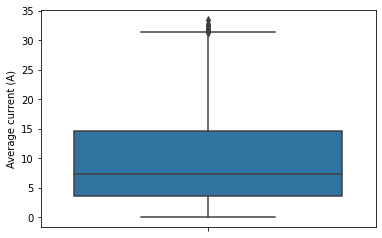

In [52]:
sns.boxplot( y="avg current",data=merged_df)
_= plt.ylabel('Average current (A)')
plt.show()

In [58]:
merged_df.drop(merged_df[merged_df['avg current']>31].index,inplace=True)

### Session duration (s) 

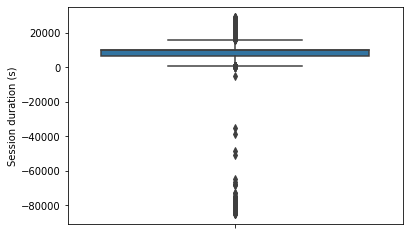

In [59]:
sns.boxplot( y="Session duration (s)",data=merged_df)
plt.show()

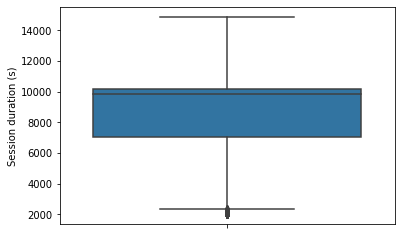

In [67]:
sns.boxplot( y="Session duration (s)",data=merged_df[(merged_df['Session duration (s)']>2000) & (merged_df['Session duration (s)']<15000) ]) 
plt.show()

In [71]:
merged_df[~((merged_df['Session duration (s)']>2000) & (merged_df['Session duration (s)']<15000) )].shape

(1739, 9)

In [74]:
merged_df.drop(merged_df[~((merged_df['Session duration (s)']>2000) & (merged_df['Session duration (s)']<15000) )].index,inplace=True)

### Maximum current (A) 

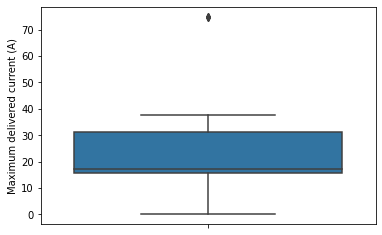

In [77]:
sns.boxplot( y="max current",data=merged_df)
_= plt.ylabel('Maximum delivered current (A)')
plt.show()

In [79]:
merged_df.drop(merged_df[merged_df['max current']>40].index,inplace=True)

### Wasted energy (A.h)

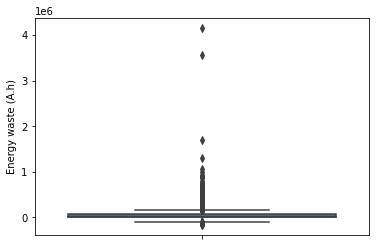

In [81]:
sns.boxplot( y="wasted energy",data=merged_df)
_= plt.ylabel('Energy waste (A.h)')
plt.show()

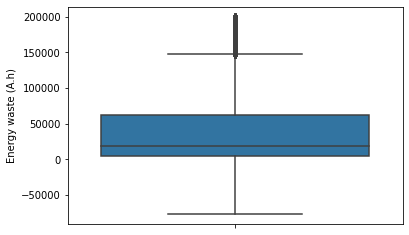

In [135]:
sns.boxplot( y="wasted energy",data=merged_df[ (merged_df["wasted energy"]>-80000) &  (merged_df["wasted energy"]<200000)])
_= plt.ylabel('Energy waste (A.h)')
plt.show()

In [136]:
merged_df.drop(merged_df[ ~((merged_df["wasted energy"]>-80000) &  (merged_df["wasted energy"]<200000))].index,inplace=True)

In [137]:
merged_df.shape

(25229, 9)

In [138]:
merged_df.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,userID,Session duration (s),avg current,max current,wasted energy
5cda0c16f9af8b0565023a33,"Sat, 27 Apr 2019 15:42:42 GMT","Sat, 27 Apr 2019 21:39:01 GMT","Sat, 27 Apr 2019 17:45:35 GMT",6.433,000001164,9695,4.893833,15.1,40356.514722
5cf46a20f9af8b02df9e088b,"Fri, 17 May 2019 17:02:16 GMT","Sat, 18 May 2019 00:12:59 GMT","Sat, 18 May 2019 00:12:55 GMT",26.832,000000832,10215,16.931574,32.0,7420.346250
5bc92edcf9af8b0dc677cced,"Sun, 29 Jul 2018 19:01:45 GMT","Mon, 30 Jul 2018 03:15:51 GMT","Mon, 30 Jul 2018 03:08:13 GMT",12.279,None,10186,6.813421,15.7,127373.383500
5bc92ab1f9af8b0dc677c8e6,"Sat, 14 Jul 2018 19:58:27 GMT","Sat, 14 Jul 2018 23:41:35 GMT","Sat, 14 Jul 2018 22:24:35 GMT",13.871,None,10207,17.229586,31.0,7708.269694
5bc93a46f9af8b0dc677d800,"Wed, 05 Sep 2018 13:26:06 GMT","Wed, 05 Sep 2018 23:12:56 GMT","Wed, 05 Sep 2018 15:57:21 GMT",7.229,None,9686,3.429266,15.9,160862.935556


In [140]:
merged_df.to_csv('Clean dataset.csv',index=False)

The output csv file is available in the Github repo under Data/